# Prédiction de séries temporelles avec filtrage contextuel

Ce notebook illustre une approche de prédiction de séries temporelles basée sur l'identification de périodes contenant de l'information pertinente. Ces périodes sont utilisées pour entraîner un classifieur permettant de détecter les moments informatifs dans les futures séquences. Ce filtrage permet ensuite d’améliorer les prédictions en se concentrant uniquement sur les périodes utiles.


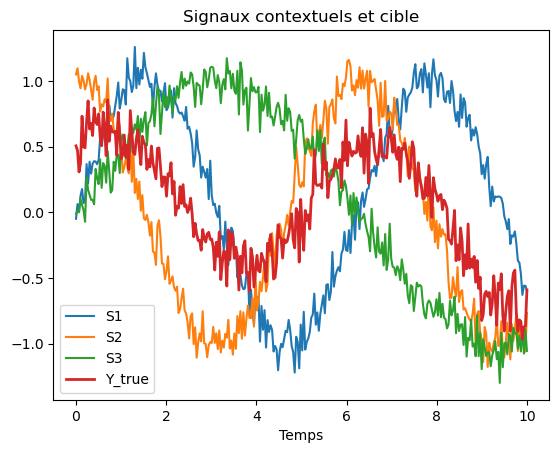

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Temps
T = np.linspace(0, 10, 300)

# Simuler 3 signaux de contexte + le signal cible
S1 = np.sin(T) + 0.1*np.random.randn(len(T))
S2 = np.cos(T) + 0.1*np.random.randn(len(T))
S3 = np.sin(0.5*T) + 0.1*np.random.randn(len(T))
True_signal = 0.3*S1 + 0.5*S2 + 0.2*S3 + 0.1*np.random.randn(len(T))

plt.plot(T, S1, label='S1')
plt.plot(T, S2, label='S2')
plt.plot(T, S3, label='S3')
plt.plot(T, True_signal, label='Y_true', linewidth=2)
plt.legend()
plt.title("Signaux contextuels et cible")
plt.xlabel("Temps")
plt.show()


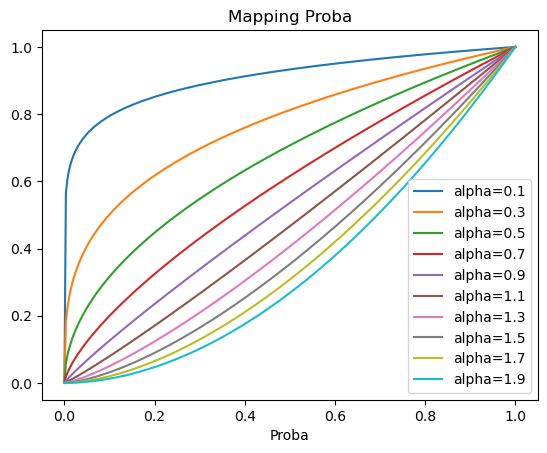

In [19]:
# Temps
T = np.linspace(0, 1, 300)

for alpha in np.arange(1,20,2):
    alpha = alpha/10
    s = [t**alpha for t in T]
    plt.plot(T, s, label=f'alpha={alpha:.1f}')
plt.legend()
plt.title("Mapping Proba")
plt.xlabel("Proba")
plt.show()

## Détection des périodes d'information via une "Caution Metric"

On introduit une métrique d'information (provenant par exemple de l'attention ou d'un classifieur entraîné) permettant de repérer les périodes où chaque signal est pertinent. Ces zones sont ensuite utilisées pour l'analyse et le filtrage.


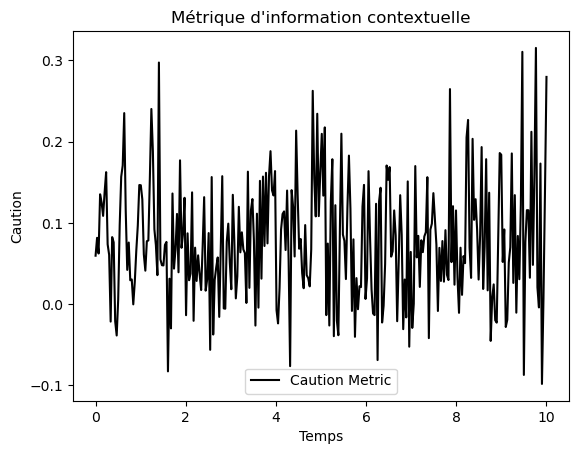

In [3]:
# Simuler une "caution metric" arbitraire
caution_metric = np.abs(np.gradient(True_signal)) + 0.05*np.random.randn(len(T))

plt.plot(T, caution_metric, label="Caution Metric", color='black')
plt.title("Métrique d'information contextuelle")
plt.xlabel("Temps")
plt.ylabel("Caution")
plt.legend()
plt.show()


## Validation du concept : preuve de faisabilité

On sélectionne les pics de la métrique d'information, puis on entraîne un classifieur sur les séquences de ces périodes. L'objectif est de prédire si une séquence donnée est utile ou non pour la prédiction.


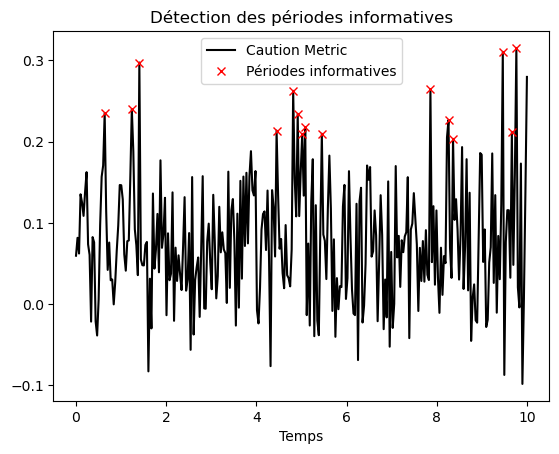

In [7]:
from scipy.signal import find_peaks

peaks, _ = find_peaks(caution_metric, height=0.2)
plt.plot(T, caution_metric, label="Caution Metric", color='black')
plt.plot(T[peaks], caution_metric[peaks], 'rx', label="Périodes informatives")
plt.title("Détection des périodes informatives")
plt.xlabel("Temps")
plt.legend()
plt.show()


## Filtrage pour la prédiction

Une fois les périodes informatives identifiées :
- On peut supprimer (ou neutraliser) les périodes non informatives.
- Utiliser les périodes utiles dans la prédiction.
- Ou bien utiliser un expert pour modéliser spécifiquement l'impact de ces périodes.

Ce filtrage réduit le bruit et renforce les signaux importants.
